In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
bank = pd.read_csv("bank.csv")

In [3]:
# bad datası good ve badly olmak üzere kategorik hale getirildi.

bank = bank.dropna(how='any')
bank["bad"] = bank["bad"].apply(lambda x: "good" if(x==0)  else "badly")
bank["bad"].value_counts()

good     1840
badly     178
Name: bad, dtype: int64

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   object 
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 197.1+ KB


In [5]:
# öncelikle hedef değişken bad seçildi ve kategorik değişkenler dataset'ten düşürüldü.

y = bank["bad"]
X = bank.drop(["bad", "reason", "job"], axis=1)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [7]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9125412541254125

In [11]:
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       badly       0.49      0.48      0.49        52
        good       0.95      0.95      0.95       554

    accuracy                           0.91       606
   macro avg       0.72      0.72      0.72       606
weighted avg       0.91      0.91      0.91       606



In [16]:
cart_grid = {"max_depth": range(1,10),
                "min_samples_split" : list(range(2,50)) 
}

cart2 = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart2, cart_grid, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 2552 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   27.3s finished


In [17]:
print("en iyi parametreler: " + str(cart_cv_model.best_params_))

en iyi parametreler: {'max_depth': 9, 'min_samples_split': 3}


### Model Tuning

In [18]:
cart = DecisionTreeClassifier(max_depth=9, min_samples_split=3)
cart_tuned = cart.fit(X_train, y_train)

In [19]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9471947194719472

### Decision Tree Classifier to Forex Dataset

In [15]:
import Functions as f
dt = f.dataPreprocessing("dataset.xlsx")

<bound method dataPreprocessing.categoric_variables of <Functions.dataPreprocessing object at 0x0AFAAE20>>

In [20]:
cv = dt.categoric_variables()
cv

['ind_109', 'ind_420', 'ind_422']

In [25]:
df = dt.toDataFrame()
df = data.copy()
df = df.dropna()

In [30]:
dms = pd.get_dummies(df["ind_109"])
X_ = df.drop(["ind_420", "ind_422", "ind_109", "50_target", "20_target"], axis=1).astype('float64')
X = pd.concat([X_, dms], axis=1)
y = df["90_target"]

In [31]:
xVifValues = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [37]:
columnNames = X.columns
vif_data = pd.DataFrame(xVifValues,columnNames)
vif_data

,0
ind_5,1901.034554
ind_6,1239.813724
ind_8,inf
ind_9,inf
ind_10,inf
...,...
ind_426,8.327488
ind_428,11.307396
90_target,1.210346
GREEN,4028.263237


In [56]:
xAfterVif

,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_28,ind_29,ind_36,ind_37,...,ind_349,ind_351,ind_352,ind_397,ind_412,ind_416,ind_424,ind_426,ind_428,90_target
0,60.808814,23.80,17.62,11.73,12.060000,9.1100,66.666667,93.692449,196.592517,184.819232,...,0.0,0.0,0.0,-26.386973,0.002371,-49.6,1.000000,0.498547,0.701906,36.997753
1,64.366798,11.45,18.16,12.22,11.326667,9.2225,66.666667,76.694104,201.738617,191.985663,...,0.0,0.0,0.0,-26.085949,0.003074,-55.6,1.000000,0.537088,0.690833,37.016198
2,65.915803,8.75,17.86,12.28,10.973333,9.3125,66.666667,83.909974,205.238017,197.993551,...,0.0,0.0,0.0,-23.250410,0.003561,-58.4,1.000000,0.615169,0.693040,-37.024805
3,68.584234,7.80,14.76,12.61,10.426667,9.4150,66.666667,98.596644,203.641362,200.370912,...,0.0,0.0,0.0,-19.499975,0.004366,-61.8,1.000000,0.661517,0.673418,-37.040483
4,76.455495,14.90,11.92,14.25,11.406667,9.8925,66.666667,149.283572,227.848369,223.561880,...,0.0,0.0,0.0,-25.348270,0.004198,-79.8,1.000000,0.747204,0.700522,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,32.362582,9.70,9.38,13.66,15.100000,16.2175,-66.666667,-166.666667,135.005556,102.453252,...,0.0,0.0,0.0,3.500000,0.004633,-28.2,0.270270,0.840000,0.600846,-35.867088
6163,32.914628,7.65,8.84,11.79,14.753333,16.1175,-66.666667,-116.371568,124.513539,96.780546,...,0.0,0.0,0.0,-2.250000,0.008511,-28.6,0.000000,0.737470,0.527673,-35.868318
6164,43.550592,8.95,9.06,10.30,14.613333,16.3125,66.666667,29.477508,132.029648,108.218518,...,0.0,0.0,0.0,-4.500000,0.008848,-37.2,0.769231,0.632107,0.551759,-35.894755
6165,54.130755,13.55,10.36,10.55,13.606667,16.4200,66.666667,148.600076,144.880140,124.933707,...,0.0,0.0,0.0,-5.850000,0.008940,-48.9,1.000000,0.733010,0.591584,-35.930723


In [64]:
xAfterVif = df.loc[:,vif_data.iloc[:][vif_data[0] < 20].index]
xAfterVif = xAfterVif.drop(["90_target"], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(xAfterVif, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [66]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=20)

In [67]:
cart_model.fit(X_train, y_train)


DecisionTreeRegressor(max_leaf_nodes=20)

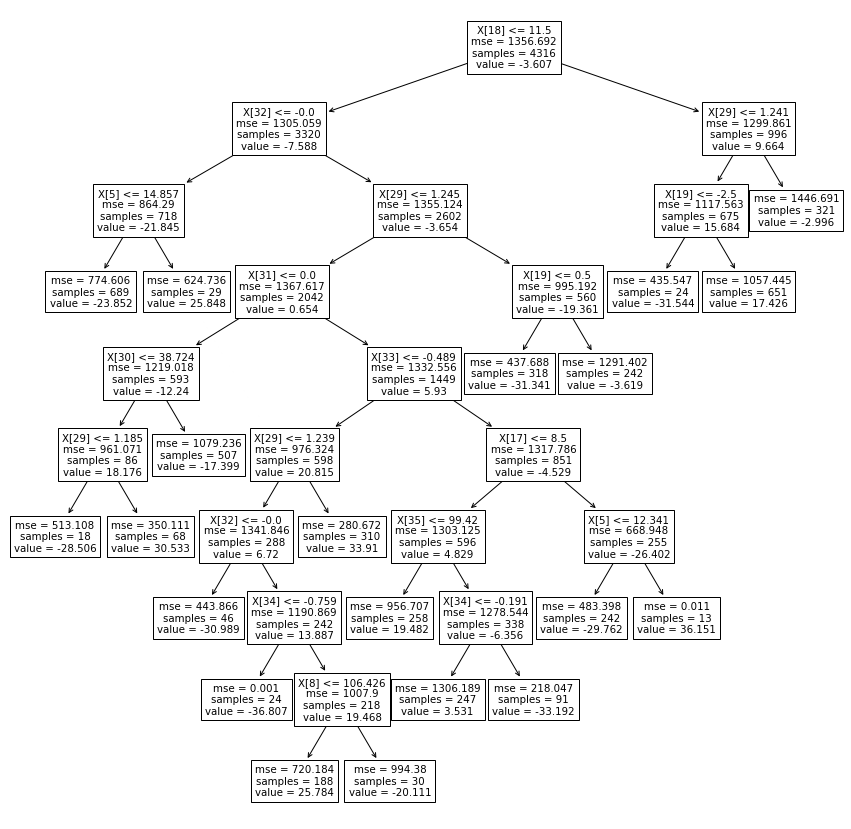

In [68]:
plt.figure(figsize=(15,15))
tree.plot_tree(cart_model);

In [69]:
y_pred =cart_model.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

31.352146674269882

In [ ]:
# üst tarafta 56 bağımsız değişkenle yapılmış model var ve mse 32.35 
# alt tarafta bütün değişkenlerle yapılmış model var 130 değişkenle yani ve mse 31.64
# çok yakın oldukları için 56 değişkenle yapmak datanın boyutunu azaltmamıza yardımcı olur.

In [71]:
X = df.drop(["ind_420", "ind_422", "ind_109", "50_target", "20_target", "90_target"], axis=1).astype('float64')
y = df["90_target"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [75]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=20)
cart_model.fit(X_train, y_train)
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

31.641056155439014

## Decision Tree Regression

In [27]:
df = pd.read_csv("bank.csv")
df = df.dropna()

In [28]:
dms = pd.get_dummies(df[["reason", "job"]])

y = df["bad"]
X_ = df.drop(["reason", "job", "bad"], axis=1).astype('float64')
X = pd.concat([X_, dms], axis=1)
X = X.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

((((((0.0 if x[1] <= 30859.0 else 1.0 if x[3] <= 6.5 else 0.0) if x[9] <= 
    32.76449966430664 else 0.0 if x[3] <= 1.5 else 1.0) if x[0] <= 9050.0 else
    (((0.0 if x[4] <= 0.5 else 0.0 if x[8] <= 8.0 else 1.0) if x[2] <= 
    45602.0 else 0.0 if x[10] <= 0.5 else 1.0) if x[0] <= 12750.0 else 0.0 if
    x[0] <= 39650.0 else 1.0) if x[9] <= 43.77349853515625 else 1.0) if x[2
    ] <= 48600.0 else (1.0 if x[9] <= 37.44599914550781 else 0.0) if x[6] <=
    44.345001220703125 else ((1.0 if x[8] <= 1.5 else ((((0.0 if x[6] <= 
    60.385000228881836 else 1.0) if x[13] <= 0.5 else 1.0) if x[6] <= 
    60.404998779296875 else ((((0.0 if x[0] <= 6850.0 else 1.0) if x[2] <= 
    58139.5 else (1.0 if x[1] <= 68316.0 else 0.0) if x[3] <= 1.5 else 0.0) if
    x[2] <= 121579.0 else 0.0 if x[8] <= 22.5 else 1.0) if x[4] <= 0.5 else
    0.0 if x[3] <= 5.5 else 1.0) if x[0] <= 6950.0 else (((((1.0 if x[9] <=
    33.51150035858154 else 0.0) if x[1] <= 38380.5 else (0.0 if x[11] <= 
    0.5 else 1.0 

In [32]:
y_pred = cart_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.25172671021102105

In [34]:

cart_params = {"min_samples_split": range(2,30),
               "min_samples_leaf": [10, 15, 20],
               "max_leaf_nodes": range(4,8)
}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [35]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(2, 30)})

In [36]:
cart_cv_model.best_params_

{'max_leaf_nodes': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}

### Model Tuning

In [37]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes= 7, min_samples_leaf= 10, min_samples_split= 2)

In [38]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=7, min_samples_leaf=10)

In [39]:
y_pred = cart_tuned.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.21681149554800838

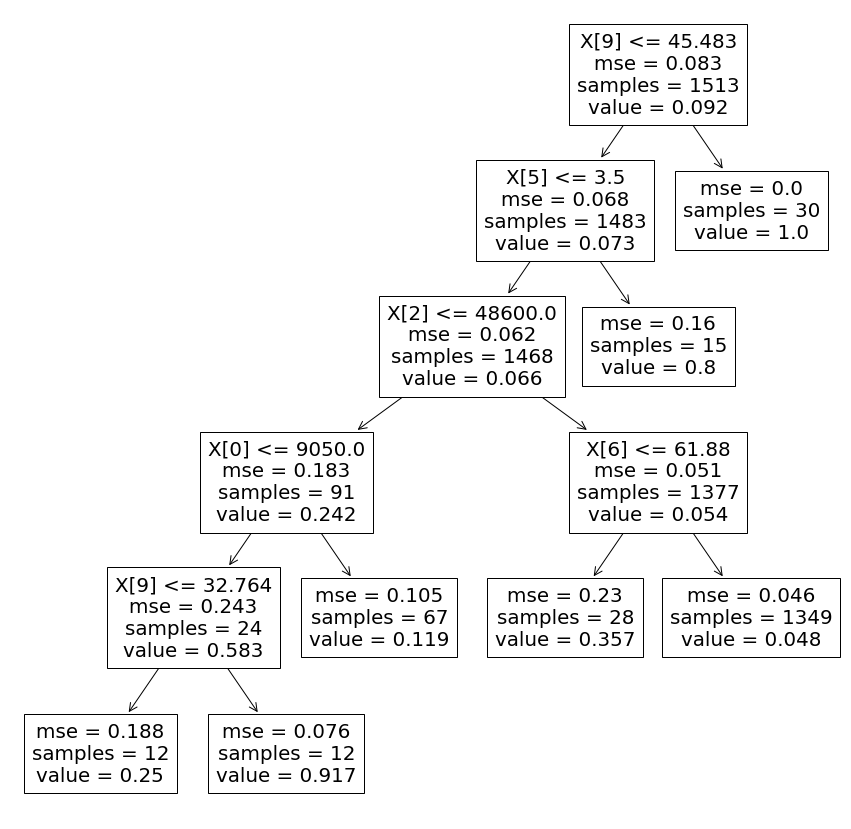

In [41]:
plt.figure(figsize=(15, 15))
tree.plot_tree(cart_tuned);

In [81]:
# 1377 samples'da ortalama 0,054'se 1377*0,054=74,358 tahmini 75 adet "1" bulunuyor. yani bad sayısı.

## Random Forests

In [47]:
bank = pd.read_csv("bank.csv")
df = bank.copy()
df = df.dropna()
y = df["bad"]
X = df.drop(["bad", "reason", "job"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1412, 10), (1412,), (606, 10), (606,))

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [52]:
y_pred = rf_model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.9521452145214522

In [54]:
cart_grid = {"max_depth": [2,3,4],
             "min_samples_split": list(range(2,50))
}

In [55]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    9.1s finished


In [56]:
print("en iyi parametreler: " + str(cart_cv_model.best_params_))

en iyi parametreler: {'max_depth': 2, 'min_samples_split': 37}


### Model Tuning

In [57]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,50,100,],
             "min_samples_split": [5,10]
}

In [58]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [59]:
print("en iyi parametreler: " + str(rf_cv_model.best_params_))

en iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 10}


In [60]:
rf_tuned = RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=5, n_estimators=10)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=5,
                       n_estimators=10)

In [61]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

### Importance grafikleri

In [62]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

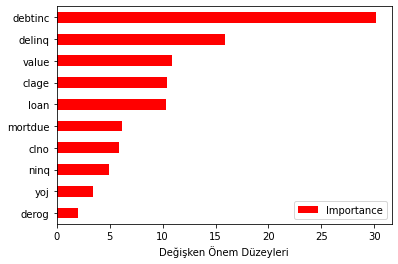

In [63]:
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel("Değişken Önem Düzeyleri")

## Random Forest Regression

In [66]:
data = pd.read_excel("dataset.xlsx")
df = data.copy()
df = df.dropna()

In [67]:
df

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,-28.2,-40,-11,-270,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,-28.6,-41,-12,-271,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,-37.2,-49,-21,-280,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,-48.9,-61,-33,-292,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [72]:
dms = pd.get_dummies(df['ind_109'])
y = df["90_target"]
X_ = df.drop(['90_target','20_target', '50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype("float64")
X=pd.concat([X_,dms], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [73]:
rf_model_reg = RandomForestRegressor(random_state=42)

In [74]:
rf_model_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Tahmin

In [75]:
rf_model_reg.predict(X_test)[:5]

array([-37.88943449,  35.95791951, -38.05391574, -22.22326004,
        18.2997835 ])

In [76]:
y_pred = rf_model_reg.predict(X_test)

In [77]:
np.sqrt(mean_squared_error(y_test, y_pred))

16.011127534421092

In [132]:
Importance = pd.DataFrame({"Importance":rf_model_reg.feature_importances_*100}, index=X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

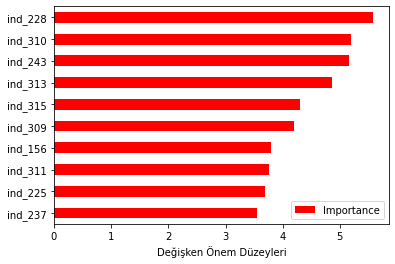

In [133]:
Importance.sort_values(by='Importance', axis=0, ascending=True).iloc[-10:,:].plot(kind='barh', color='r')
plt.xlabel("Değişken Önem Düzeyleri")

### model tuning

In [98]:
rfr_params = {"max_depth": list(range(1,10)),
              "max_features": [3,5,7,9],
              "n_estimators": [10,20,50]}
rfr_model = RandomForestRegressor(random_state=42)

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 633 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.8min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 7, 9],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [99]:
rfr_cv_model.best_params_

{'max_depth': 9, 'max_features': 9, 'n_estimators': 50}

In [100]:
rf_tuned = RandomForestRegressor(max_depth=9, max_features=9, n_estimators=50)

In [101]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=9, n_estimators=50)

In [102]:
y_pred = rf_tuned.predict(X_test)

In [103]:
np.sqrt(mean_squared_error(y_test, y_pred))

24.950382169698425

Text(0.5, 0, 'Değişken Önem Düzeyleri')

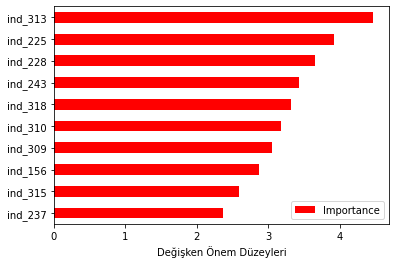

In [131]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).iloc[-10:,:].plot(kind='barh', color='r')
plt.xlabel("Değişken Önem Düzeyleri")

## Neural Network

In [27]:
data = pd.read_excel("dataset.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df['ind_109'])
y = df["90_target"]
X_ = df.drop(['90_target','20_target', '50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype("float64")
X=pd.concat([X_,dms], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.neural_network import MLPRegressor

In [33]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)

In [35]:
y_pred = mlp_model.predict(X_test_scaled)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

22.816215631754655

In [11]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "activation": ["relu","logistic"]}

In [12]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10)

In [13]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005]})

In [14]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01}

In [15]:
mlp_tuned = MLPRegressor(activation='relu', alpha=0.01)

In [16]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01)

In [17]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

25.463426281353097

In [9]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(5,5), (10,5,15), (40,25,20)],
             "activation": ["relu","logistic"]}

In [11]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_param2, cv=10, n_jobs=-1, verbose=2)

In [12]:
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.5min finished


GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(5, 5), (10, 5, 15),
                                                (40, 25, 20)]},
             verbose=2)

In [13]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (40, 25, 20)}

In [40]:
mlp_tuned_cl = MLPRegressor(alpha= 0.005, hidden_layer_sizes=(40, 25, 20), activation="relu")

mlp_tuned_cl.fit(X_train_scaled, y_train)

y_pred = mlp_tuned_cl.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

23.612705189658453